In [1]:
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Importing dataset (sklearn breast_cancer dataset)

In [2]:
# Loading data
data = load_breast_cancer()
# Making features dataframe
data_df = pd.DataFrame(data=data.data, columns=data.feature_names)
# Making Label dataframe
target_df = pd.DataFrame({"Target": data.target})

In [3]:
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
target_df

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


# Train & Predict Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# RandomForest Classifier
model = RandomForestClassifier(n_estimators=50, random_state=42)
# Train(fit) the model to the train dataset
model.fit(X_train, y_train)
# Predict on test dataset
y_pred = model.predict(X_test)

# See results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9707602339181286


# Visualization

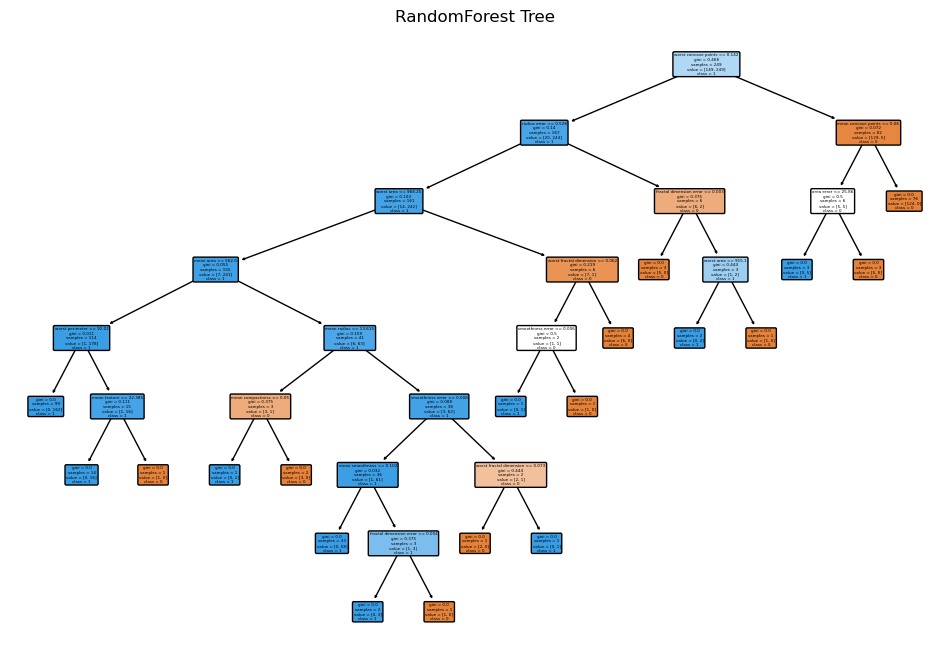

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access one of the estimators (e.g., the first one)
estimator = model.estimators_[0]

# Plot one of the decision trees(estimators)
plt.figure(figsize=(12, 8))
plot_tree(estimator,
          feature_names=data.feature_names,
          class_names=model.classes_.astype(str),
          filled=True,
          rounded=True)
plt.title('RandomForest Tree')
plt.show()

In [19]:
import numpy as np

# Choose the tree index you want to inspect
tree_index = 5
tree = model.estimators_[tree_index].tree_

# Find unique features used in the tree
features_used = np.unique(tree.feature[tree.feature >= 0])  # Exclude nodes without a split

# Map feature indices to feature names if available
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
features_used_names = [feature_names[i] for i in features_used]

print("Features used in Tree", tree_index, ":", features_used_names)

Features used in Tree 5 : ['Feature 2', 'Feature 6', 'Feature 7', 'Feature 13', 'Feature 14', 'Feature 15', 'Feature 17', 'Feature 20', 'Feature 21', 'Feature 22', 'Feature 25', 'Feature 26', 'Feature 27']
